## Constructed Code

In [1]:
import networkx as nx
import numpy as np

In [2]:
def nodes_reachable_from(largest_strong, H):
    a = H.number_of_nodes()
    b = H.number_of_edges()
    H.add_node("out")
    for i in largest_strong:
        H.add_edge("out", i, weight = 1)
    OUT = set(nx.descendants(H, "out"))
    H.remove_node("out")
    c = H.number_of_nodes()
    d = H.number_of_edges()
    assert(a==c and b==d)
    return OUT

def nodes_reachable_to(largest_strong, H):
    a = H.number_of_nodes()
    b = H.number_of_edges()
    H.add_node("in")
    for i in largest_strong:
        H.add_edge(i, "in", weight = 1)
    IN = set(nx.ancestors(H, "in"))
    H.remove_node("in")
    c = H.number_of_nodes()
    d = H.number_of_edges()
    assert(a==c and b==d)
    return IN

In [3]:
path = "D:\\Academics\\Introduction to Data Science\\project\\data\\DG_ME\\"

In [4]:
intend = []
outend = []
incomp = []
outcom = []
lcc = []
tub = []
newcomp = []
for year in range(2010, 2012):
    for month in range(1,13):
        G = nx.read_graphml(path+str(year) + "_" + str(month) + ".graphml")
        G.remove_nodes_from(list(nx.isolates(G)))
        largest_weak = max(nx.weakly_connected_components(G), key=len)
        H = G.subgraph(largest_weak)
        H = nx.MultiDiGraph(H)
        largest_strong = max(nx.strongly_connected_components(H), key=len)
        
        OUT = nodes_reachable_from(largest_strong, H)
        IN = nodes_reachable_to(largest_strong, H)
        common = OUT.intersection(IN)
        OUT = OUT.difference(common)
        IN = IN.difference(common)
        
        in_tendrils = nodes_reachable_from(IN, H).difference(largest_strong, IN, OUT)
        out_tendrils = nodes_reachable_to(OUT, H).difference(largest_strong, IN, OUT)
        tubes = in_tendrils.intersection(out_tendrils)
        out_tendrils = out_tendrils.difference(tubes)
        in_tendrils = in_tendrils.difference(tubes)
        
        new = set(H.nodes()).difference(in_tendrils.union(out_tendrils, IN, OUT, largest_strong, tubes))
        
        print(len(in_tendrils), len(out_tendrils), len(IN), len(OUT), len(largest_strong), len(tubes), len(new))
        intend.append(len(in_tendrils))
        outend.append(len(out_tendrils))
        incomp.append(len(IN))
        outcom.append(len(OUT))
        lcc.append(len(largest_strong))
        tub.append(len(tubes))
        newcomp.append(len(new))
#         g = G.subgraph(new)
#         s1 = 0
#         for i in g.edges.data():
#             s1+=(i[2]['weight'])
#         s2 = 0
#         for i in G.edges.data():
#             s2+=(i[2]['weight'])
#         print(s1, s2, s1/s2)
#         print(H.number_of_nodes() - (len(in_tendrils) + len(out_tendrils) + len(IN) + len(OUT) + len(largest_strong) + len(tubes) + len(new)))

0 0 9 0 1 0 0
0 0 8 1 2 0 0
2 0 11 0 1 0 3
18 54 1141 30 1997 1 112
18 73 1165 179 2027 10 36
31 16 1334 248 2534 3 19
88 1498 2467 5843 10849 54 46
129 330 4190 7332 14368 106 104
155 265 4983 7695 21094 73 57
178 261 5368 8913 28707 70 30
234 321 5818 11238 39440 128 50
479 323 8134 15288 47533 274 80
886 440 18639 18908 61605 444 67
1517 630 36732 31149 82062 883 99
2790 662 60394 51498 115787 1421 96
2826 701 84805 54856 173353 1544 71
8551 678 159839 87291 239505 2863 101
30299 597 342329 138694 406381 4455 121


MemoryError: 

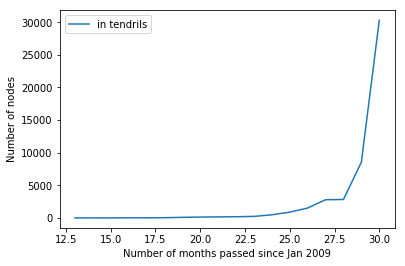

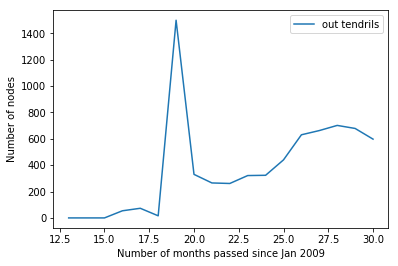

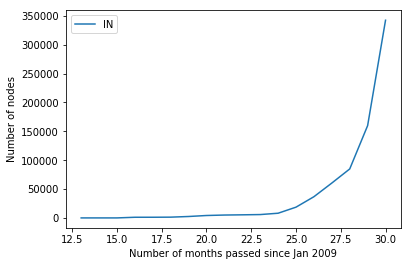

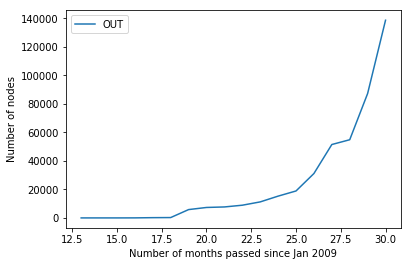

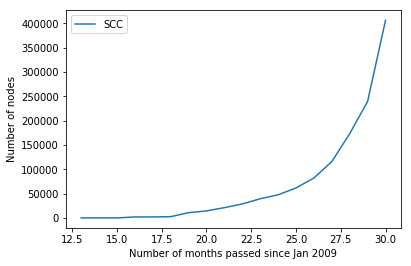

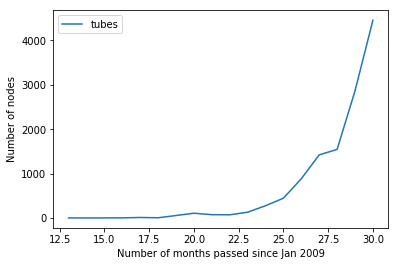

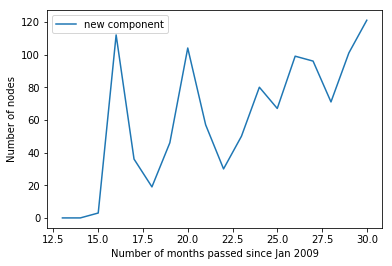

In [9]:
import matplotlib.pyplot as plt

plt.plot(range(13, 31), intend, label = "in tendrils")
plt.xlabel("Number of months passed since Jan 2009")
plt.ylabel("Number of nodes")
plt.legend()
plt.show()
plt.plot(range(13, 31), outend, label = "out tendrils")
plt.xlabel("Number of months passed since Jan 2009")
plt.ylabel("Number of nodes")
plt.legend()
plt.show()
plt.plot(range(13, 31), incomp, label = "IN")
plt.xlabel("Number of months passed since Jan 2009")
plt.ylabel("Number of nodes")
plt.legend()
plt.show()
plt.plot(range(13, 31), outcom, label = "OUT")
plt.xlabel("Number of months passed since Jan 2009")
plt.ylabel("Number of nodes")
plt.legend()
plt.show()
plt.plot(range(13, 31), lcc, label = "SCC")
plt.xlabel("Number of months passed since Jan 2009")
plt.ylabel("Number of nodes")
plt.legend()
plt.show()
plt.plot(range(13, 31), tub, label = "tubes")
plt.xlabel("Number of months passed since Jan 2009")
plt.ylabel("Number of nodes")
plt.legend()
plt.show()
plt.plot(range(13, 31), newcomp, label = "new component")
plt.xlabel("Number of months passed since Jan 2009")
plt.ylabel("Number of nodes")
plt.legend()
plt.show()
# plt.xlabel("Number of months passed since Jan 2009")
# plt.ylabel("Number of nodes")
# plt.legend()
# plt.show()

## Original Code

In [1]:
import networkx as nx
import numpy as np

In [2]:
path = "D:\\Academics\\Introduction to Data Science\\project\\data\\DG_ME\\"
G = nx.read_graphml(path+"2010_12.graphml")
G.remove_nodes_from(list(nx.isolates(G)))

In [3]:
def invert_dict(d):
    d2 = {}
    for i in d:
        if d[i] in d2:
            d2[d[i]].append(i)
        else:
            d2[d[i]] = [i]
    return d2

In [4]:
largest_weak = max(nx.weakly_connected_components(G), key=len)
len(largest_weak), G.number_of_nodes(), len(largest_weak)/ G.number_of_nodes()

(72111, 72597, 0.9933055084920864)

In [5]:
H = G.subgraph(largest_weak)
H.number_of_nodes(), H.number_of_edges(), H.number_of_edges()/H.number_of_nodes(), H.number_of_edges()/G.number_of_edges()

(72111, 194402, 2.695871642329187, 0.9976188765613293)

In [6]:
# [len(c) for c in sorted(nx.attracting_components(H), key=len, reverse=True)]

In [7]:
largest_strong = max(nx.strongly_connected_components(H), key=len)
len(largest_strong), H.number_of_nodes(), len(largest_strong)/ H.number_of_nodes()

(47533, 72111, 0.6591643438587733)

In [8]:
indegree = invert_dict(dict(H.in_degree()))
outdegree = invert_dict(dict(H.out_degree()))
len(indegree[0]), len(outdegree[0])

(1726, 11146)

In [9]:
len(set(H.nodes).difference(set(indegree[0]).union(outdegree[0], largest_strong))) 

11706

In [10]:
# ([len(c) for c in sorted(nx.strongly_connected_components(H), key=len, reverse=True)])

In [11]:
print(H.number_of_edges(), H.number_of_nodes())
H = nx.MultiDiGraph(H)
print(H.number_of_edges(), H.number_of_nodes())

194402 72111
194402 72111


In [12]:
def nodes_reachable_from(largest_strong, H):
    a = H.number_of_nodes()
    b = H.number_of_edges()
    H.add_node("out")
    for i in largest_strong:
        H.add_edge("out", i, weight = 1)
    OUT = set(nx.descendants(H, "out"))
    H.remove_node("out")
    c = H.number_of_nodes()
    d = H.number_of_edges()
    assert(a==c and b==d)
    return OUT

In [13]:
def nodes_reachable_to(largest_strong, H):
    a = H.number_of_nodes()
    b = H.number_of_edges()
    H.add_node("in")
    for i in largest_strong:
        H.add_edge(i, "in", weight = 1)
    IN = set(nx.ancestors(H, "in"))
    H.remove_node("in")
    c = H.number_of_nodes()
    d = H.number_of_edges()
    assert(a==c and b==d)
    return IN

In [14]:
OUT = nodes_reachable_from(largest_strong, H)
IN = nodes_reachable_to(largest_strong, H)
common = OUT.intersection(IN)
OUT = OUT.difference(common)
IN = IN.difference(common)

In [15]:
len(OUT), len(IN)

(15288, 8134)

In [16]:
common.difference(largest_strong)

set()

In [17]:
in_tendrils = nodes_reachable_from(IN, H).difference(largest_strong, IN, OUT)
out_tendrils = nodes_reachable_to(OUT, H).difference(largest_strong, IN, OUT)
tubes = in_tendrils.intersection(out_tendrils)
out_tendrils = out_tendrils.difference(tubes)
in_tendrils = in_tendrils.difference(tubes)

In [18]:
len(in_tendrils), len(out_tendrils), len(IN), len(OUT), len(largest_strong), len(tubes)

(479, 323, 8134, 15288, 47533, 274)

In [19]:
new = set(H.nodes()).difference(in_tendrils.union(out_tendrils, IN, OUT, largest_strong, tubes))

In [20]:
len(new), H.number_of_nodes() - (len(in_tendrils) + len(out_tendrils) + len(IN) + len(OUT) + len(largest_strong) + len(tubes))

(80, 80)

In [21]:
# a =  nodes_reachable_from(largest_strong, H).difference(largest_strong)
# b =  nodes_reachable_to(largest_strong, H).difference(largest_strong)
# c =  nodes_reachable_from(b, H).difference(largest_strong, b)
# d =  nodes_reachable_to(a, H).difference(largest_strong, a)
# e =  nodes_reachable_from(a, H).difference(largest_strong, a)
# f =  nodes_reachable_to(b, H).difference(largest_strong, b)
# for i in what:
#     if (i in a) or (i in b) or (i in c) or (i in d):
#         print(i)
#     elif (i in e) or (i in f):
#         print(i, "1")

In [22]:
# for i in what:
#     for j in nx.ancestors(H, i):
#         fl=1
#         if j not in what:
#             if j in a:
#                 print(j, "1")
#                 fl=0
#             if j in b:
#                 print(j, "2")
#                 fl=0
#             if j in c:
#                 print(j, "3")
#                 fl=0
#             if j in d:
#                 print(j, "4")
#                 fl=0
#             if j in e:
#                 print(j, "5")
#                 fl=0
#             if j in f:
#                 print(j, "6")
#                 fl=0
#             if fl==1:
#                 print(j, "7")
            

In [39]:
# out_new = nodes_reachable_from(new, H).difference(new)
# in_new = nodes_reachable_to(new, H).difference(new)

In [40]:
# len(out_new), len(in_new)

In [41]:
# for i in out_new:
#     print(H.out_degree(i))
# for i in in_new:
#     print(H.in_degree(i))